# Week 3

Generic Declarations

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

Split long string with column names to generate a **List**:

In [66]:
x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
columns = x.split('|')
print type(columns)
print columns

<type 'list'>
['id', 'postedTime', 'body', 'None', "['twitter_entiteis:urls:url']", "['None']", "['actor:languages_list-items']", 'gnip:language:value', 'twitter_lang', "[u'geo:coordinates_list-items']", 'geo:type', 'None', 'None', 'None', 'None', 'actor:utcOffset', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'actor:displayName', 'actor:preferredUsername', 'actor:id', 'gnip:klout_score', 'actor:followersCount', 'actor:friendsCount', 'actor:listedCount', 'actor:statusesCount', 'Tweet', 'None', 'None', 'None']


In [3]:
df = pd.read_csv('~/yorkBigData-master/assignments/data/twitter_sample.csv', sep='|', names=columns)
print df.head(2)

                                               id                postedTime  \
0  tag:search.twitter.com,2005:351835317671690241  2013-07-01T22:50:51.000Z   
1  tag:search.twitter.com,2005:351835317604593666  2013-07-01T22:50:51.000Z   

                         body  None ['twitter_entiteis:urls:url'] ['None']  \
0  kavga edelim ama konuşalım  None                          None     None   
1       @shane_joersz wooooow  None                          None     None   

  ['actor:languages_list-items'] gnip:language:value twitter_lang  \
0                         ['tr']                  en           tr   
1                         ['en']                  en           es   

  [u'geo:coordinates_list-items'] geo:type  \
0                            None     None   
1     [47.29088246, -101.0379045]    Point   

                                              None.1   None.2        None.3  \
0  ['[25.663883, 35.817497]', '[25.663883, 42.109...  Polygon       Türkiye   
1  ['[-101.043785, 47.

Remove empty columns:

In [4]:
print df.drop( [u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13'],axis=1).columns
df.head(2)

Index([u'id', u'postedTime', u'body', u'None',
       u'['twitter_entiteis:urls:url']', u'['None']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'None.1', u'None.2', u'None.3', u'None.4', u'actor:utcOffset',
       u'actor:displayName', u'actor:preferredUsername', u'actor:id',
       u'gnip:klout_score', u'actor:followersCount', u'actor:friendsCount',
       u'actor:listedCount', u'actor:statusesCount', u'Tweet', u'None.14',
       u'None.15', u'None.16'],
      dtype='object')


,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None


Create a new **DataFrame** by selecting specific columns:

In [5]:
df2 = df[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount"]]
df2.head(2)

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount
0,35,178,129,0
1,32,144,215,0


If a column's data type shows as ***object*** it means that it contais multiple types of data in it. We'll now fix it.

In [6]:
# Create an utility function
def convertToFloat(x):
    if x == None or x == 'None':
        return 0.0
    else:
        return float(x)

In [7]:
df2['gnip:klout_score'] = df2['gnip:klout_score'].map(convertToFloat)
df2 = df2.astype(float)
df2.dtypes

/bda/app/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
dtype: object

Add an extra column:

In [8]:
df2['fol/fr'] = df2['gnip:klout_score'] / df2['actor:followersCount']
df2.head(2)

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,fol/fr
0,35.0,178.0,129.0,0.0,0.196629
1,32.0,144.0,215.0,0.0,0.222222


### Grouping ###

*** groupby() *** works the same as in SQL

In [9]:
popular_users = df[df["actor:followersCount"] >= 50]
popular_users.groupby("twitter_lang").size()

twitter_lang
ar      1
da      1
en     36
es     15
fr      3
he      1
id      4
it      3
ja      1
ko      1
lv      1
pl      1
pt     10
tr      5
und     2
vi      1
dtype: int64

Combining **groupBy()** with **head()** could cause unintended consequences:

In [10]:
df3 = popular_users[['twitter_lang', 'actor:followersCount', 'actor:friendsCount']].groupby('twitter_lang')
print df3.head(2)

   twitter_lang  actor:followersCount  actor:friendsCount
0            tr                   178                 129
1            es                   144                 215
3            es                   438                 174
5            tr                   226                 346
6            pt                   247                  64
8            en                   380                 860
9            en                   160                 135
16          und                  1179                 628
18           he                   151                 284
20           it                  1999                 293
21           pt                   137                  89
22           id                   258                 302
24           pl                  2037                1984
29           id                   404                 378
33           ko                   170                 120
38          und                   228                 185
42           a

### Plotting

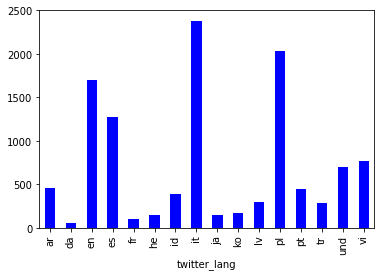

In [11]:
df3_mean = df3.aggregate(np.mean)
df3_mean['actor:followersCount'].plot(kind='bar', color='b')

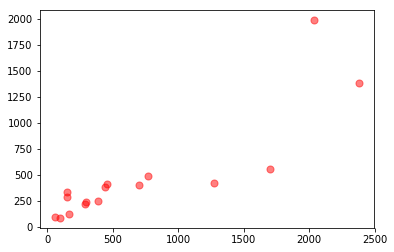

In [12]:
plt.scatter(x=df3_mean['actor:followersCount'],\
            y=df3_mean['actor:friendsCount'],\
            alpha=0.5,\
            s=50,\
            color='red',\
            marker='o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ac737a290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6ac7261090>]], dtype=object)

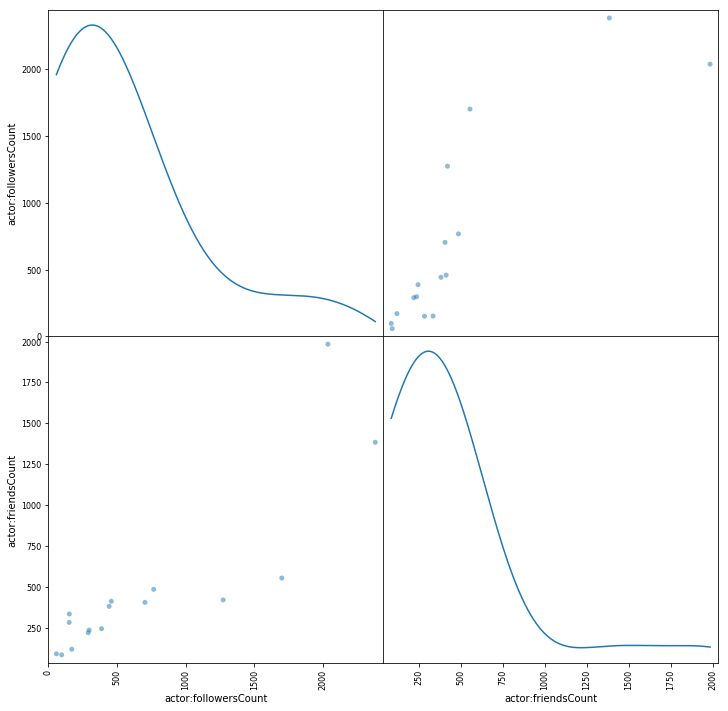

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(df3_mean, alpha=0.5, figsize=(12,12), diagonal='kde', s=100)

The following graph uses made-up data:

In [3]:
# make up some data with large-scale patterns and a datetime index
df4 = pd.DataFrame(np.random.randn(100, 4), index=pd.date_range('1/1/2000', periods=100), columns=list('ABCD'))
df4 = df4.cumsum()
df4.head()

,A,B,C,D
2000-01-01,0.526882,0.338087,0.704900,-0.385810
2000-01-02,-0.223349,0.167770,-0.451981,-0.141581
2000-01-03,-1.326501,0.986237,-0.626249,-0.395003
2000-01-04,-3.545765,0.567149,-0.676819,0.558479
2000-01-05,-3.181442,-1.315797,0.747784,0.027960


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe19d3df6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe19d31ea10>]], dtype=object)

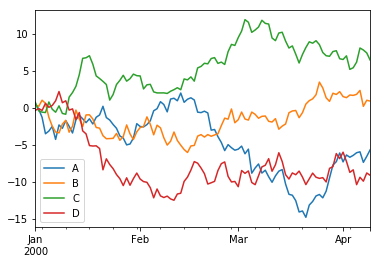

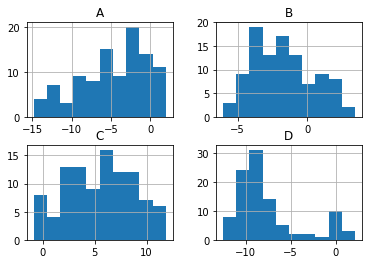

In [4]:
df4.plot()
df4.hist()

Now we start playing with **prettyplotlib**. This is a wrapper class that improves matplotlib.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe19d0bf210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe19d00c410>]], dtype=object)

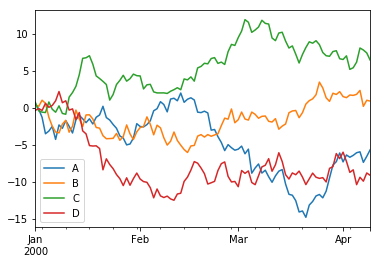

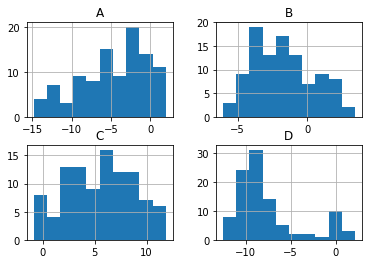

In [5]:
import prettyplotlib

df4.plot()
df4.hist()

### Visualizing the distribution of a dataset ###

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

displot example (check Histogram and Kernel Density Estimation KDE)

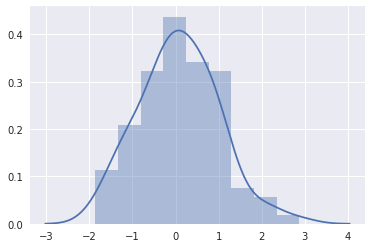

In [7]:
y = np.random.normal(size=100)
sns.distplot(y)

Another histogram example (with no KDE):

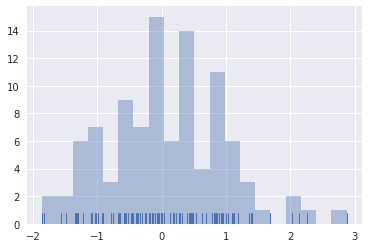

In [8]:
sns.distplot(y, bins=20, kde=False, rug=True);

### KDE examples ###

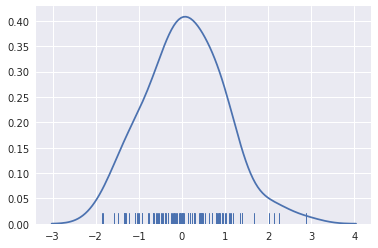

In [9]:
sns.distplot(y, hist=False, rug=True);

We can play with the bandwidth parameter to adjust how close the graph fits the data (the lower it is more details will be displayed)

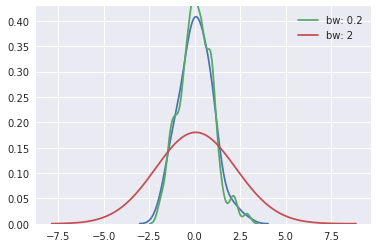

In [10]:
sns.kdeplot(y)
sns.kdeplot(y, bw=.2, label="bw: 0.2")
sns.kdeplot(y, bw=2, label="bw: 2")
plt.legend();

TODO: Investigate parametric distribution

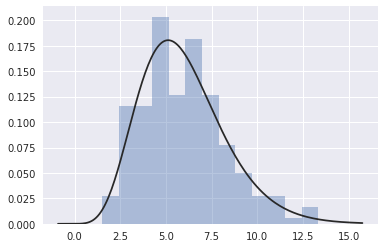

In [11]:
z = np.random.gamma(6, size=200)
sns.distplot(z, kde=False, fit=stats.gamma);

### Plotting bivariate distributions

In [16]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 100)
df1 = pd.DataFrame(data, columns=["a", "b"])
print df1.head()

          a         b
0  0.286328  1.095050
1 -1.427682  1.989405
2 -1.255197  0.073867
3  0.314947  0.981441
4 -0.696537  1.084037


** Scatterplot **

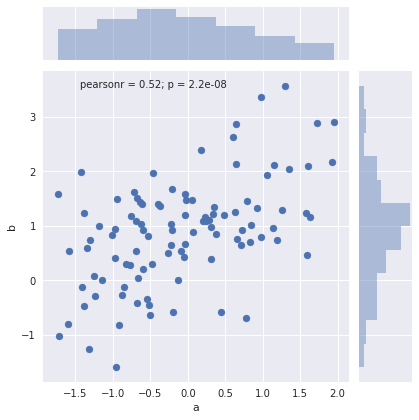

In [17]:
sns.jointplot(x="a", y="b", data=df1)

** Hexbin Plot **

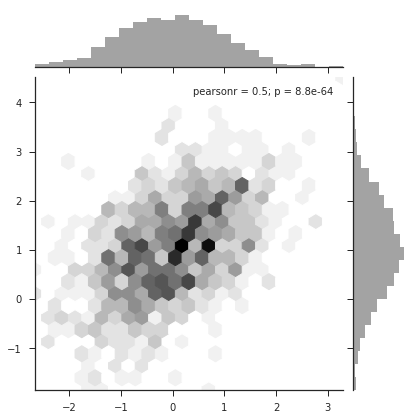

In [34]:
s, t = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("ticks"):
    sns.jointplot(x=s, y=t, kind="hex", color="k");

** Kernel density estimation **

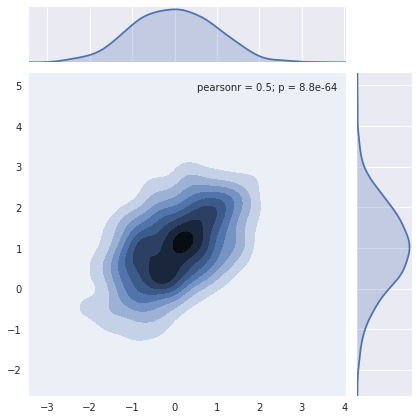

In [35]:
sns.jointplot(x=s, y=t, data=df1, kind="kde");

With **kdeplot** you have more control over the graph:

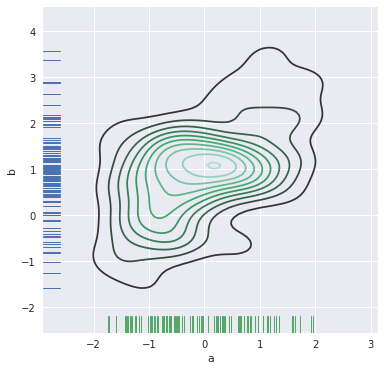

In [38]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df1.a, df1.b, ax=ax)
sns.rugplot(df1.a, color="g", ax=ax)
sns.rugplot(df1.b, vertical=True, ax=ax);

### Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset.

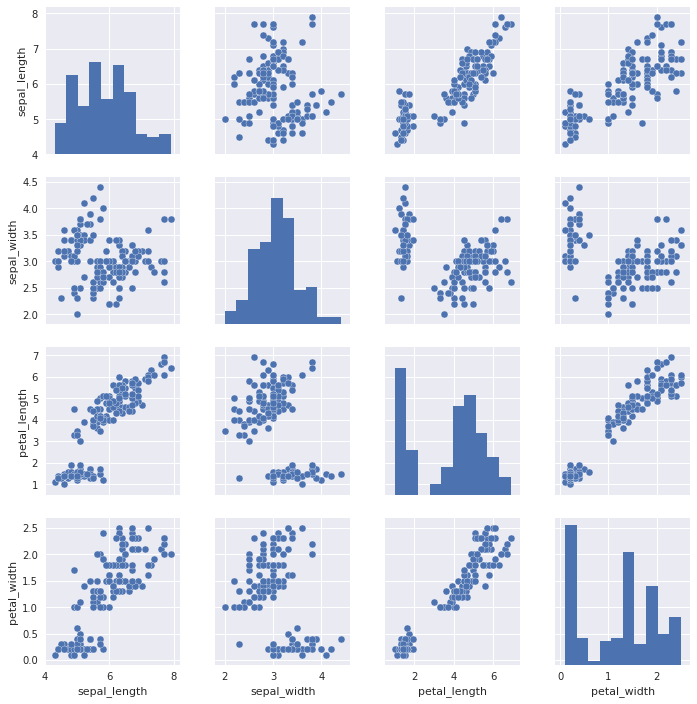

In [39]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

**PairGrid** example:

No handlers could be found for logger "matplotlib.legend"
/bda/app/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


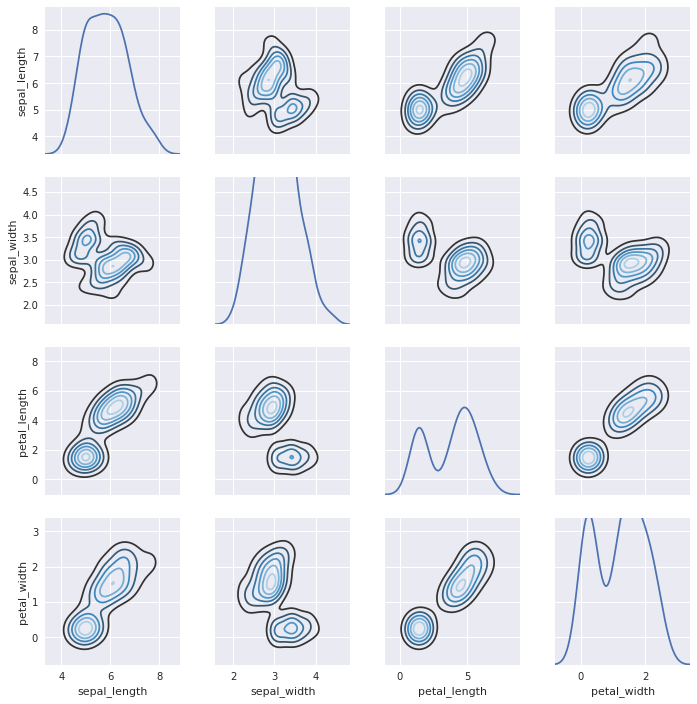

In [40]:
f = sns.PairGrid(iris)
f.map_diag(sns.kdeplot)
f.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

###  Visualizing linear relationships ###

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
tip = sns.load_dataset("tips")

** regplot** vs **lmplot**

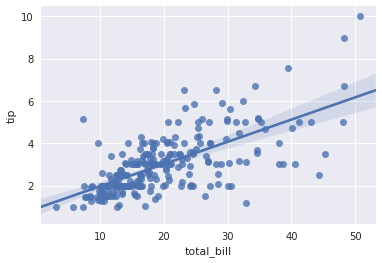

In [3]:
sns.regplot(x="total_bill", y="tip", data=tip)

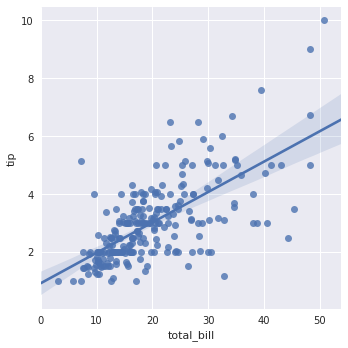

In [4]:
sns.lmplot(x="total_bill", y="tip", data=tip)

Linear regression with jitter:

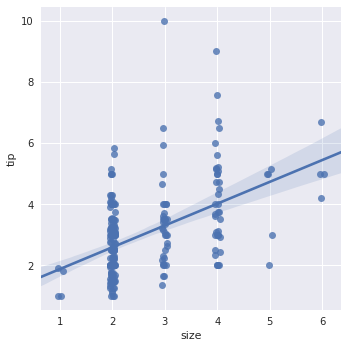

In [5]:
sns.lmplot(x="size", y="tip", data=tip, x_jitter=.05);

### Fitting different kinds of models ###

Example of when a linear relationship is not a good fit:

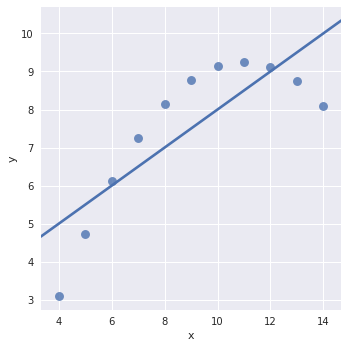

In [7]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

Here's a better match:

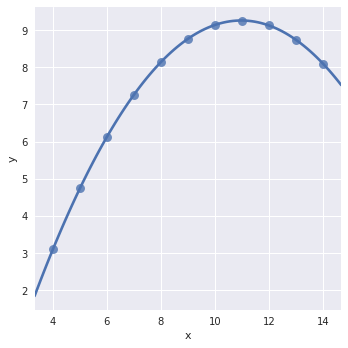

In [10]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

Use robust regression to downweight outliers:

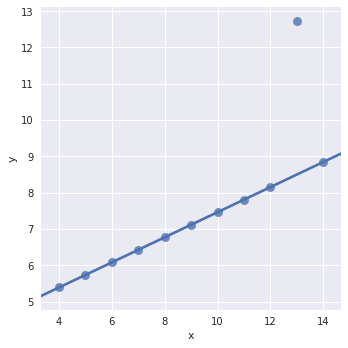

In [11]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

**Lowess smoother**

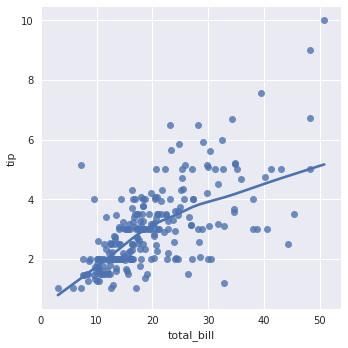

In [13]:
sns.lmplot(x="total_bill", y="tip", data=tip,
           lowess=True);

**residplot** is used to check whether a linear relationship is appropiate for a dataset.

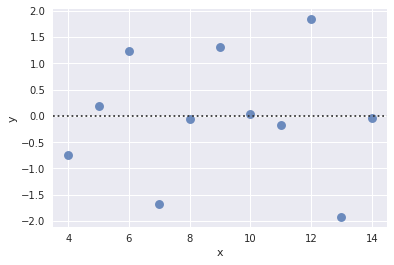

In [14]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

Here's an example when a linear relationship is not appropiate:

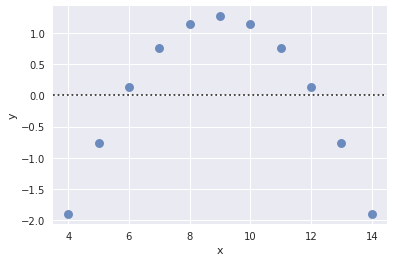

In [15]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

### Conditioning on other variables

Use of **lmplot** with three variables:

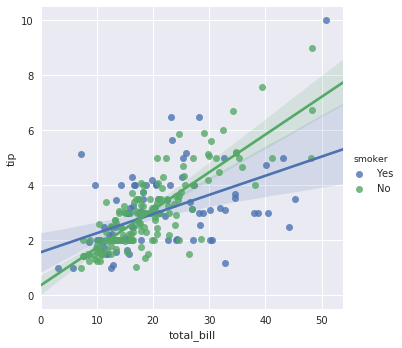

In [16]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tip)

Then you can add even one more variables:

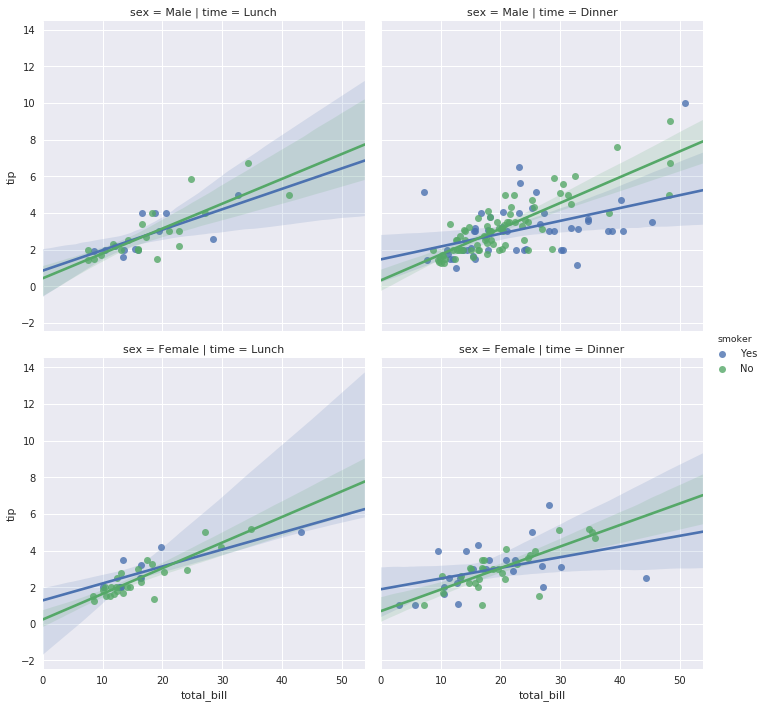

In [17]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tip);

### Controlling the size and shape of the plot

For size and shape, **regplot** requires a figure object.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


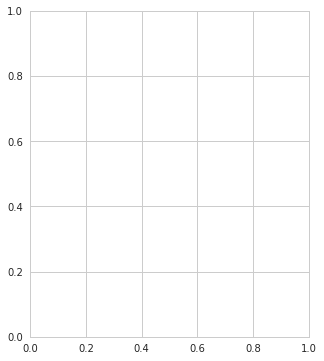

In [68]:
f, ax = plt.subplots(figsize=(5, 6))
print type(f)
print type(ax)

NOTE: the graph below does not show properly if the ax variable is declared on a different cell.

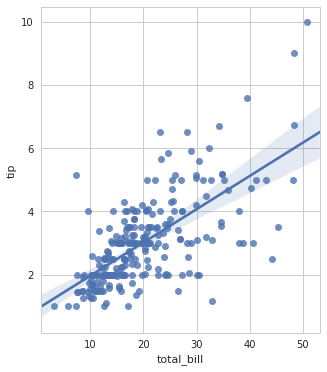

In [70]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tip, ax=ax)

For size and shape, **lmplot** requires a size and aspect parameters:

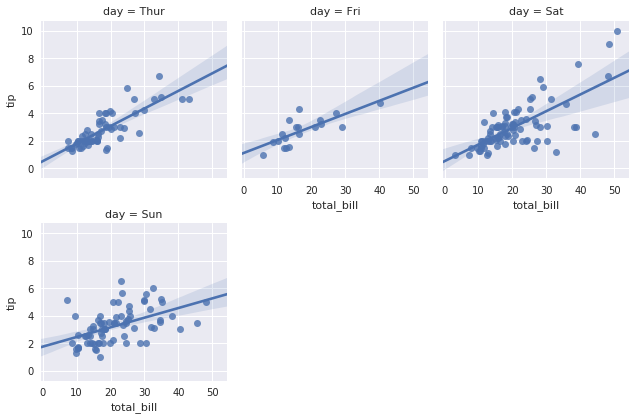

In [25]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tip,
           col_wrap=3, size=3);

## Plotting with categorical data

Categorical data: Categorical variables represent types of data which may be divided into groups. Examples of categorical variables are race, sex, age group, and educational level. While the latter two variables may also be considered in a numerical manner by using exact values for age and highest grade completed, it is often more informative to categorize such variables into a relatively small number of groups. 

In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
barco = sns.load_dataset("titanic")
propina = sns.load_dataset("tips")
flower = sns.load_dataset("iris")
propina.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### Categorical scatterplots

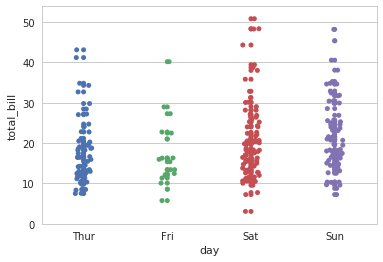

In [31]:
sns.stripplot(x="day", y="total_bill", data=propina)
## Now the same app but with jitter added to better see the distribution of data
sns.stripplot(x="day", y="total_bill", data=propina,jitter=True)

**swamplot** offers an alternative solution to visualize data distribution.

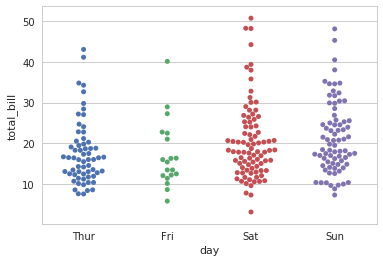

In [33]:
sns.swarmplot(x="day", y="total_bill", data=propina)

Adding another variable (hue) to the previous graph:

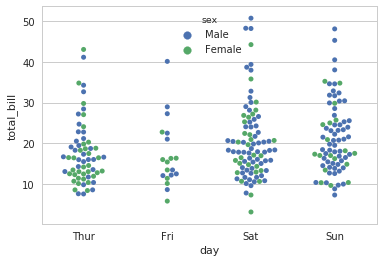

In [34]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=propina)

Changing the orientation here (just flip the axes):

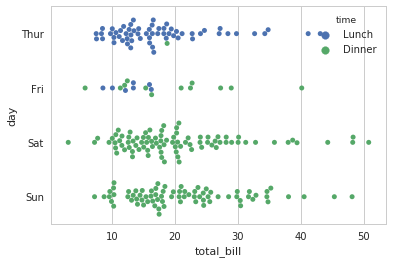

In [36]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=propina)

## Distributions of observations within categories

**boxplot** helps to summarize categorical scatterplots, making comparison easier.

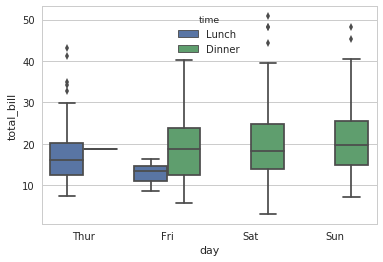

In [39]:
sns.boxplot(x="day", y="total_bill", hue="time", data=propina)

**violinplot** combines a **boxplot** with the KDE

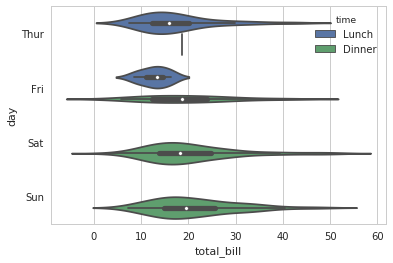

In [40]:
sns.violinplot(x="total_bill", y="day", hue="time", data=propina)

**violinplot** has more options available to adjust the KDE

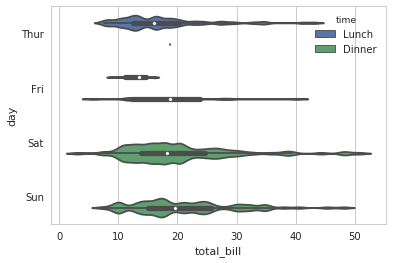

In [41]:
sns.violinplot(x="total_bill", y="day", hue="time", data=propina,
               bw=.1, scale="count", scale_hue=False)

You can also split the violin (I like this option more)

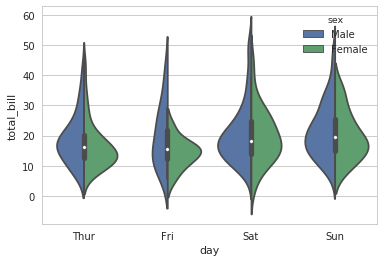

In [44]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=propina, split=True)

You can combine **swarmplot** with **violinplot**

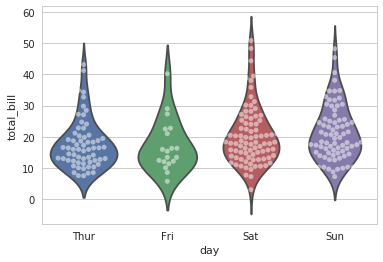

In [45]:
sns.violinplot(x="day", y="total_bill", data=propina, inner=None)
sns.swarmplot(x="day", y="total_bill", data=propina, color="w", alpha=.5)

## Statistical estimation within categories

These graphs are used to show tendencies rathen than data distribution. Two methods are employed: bar plots and point plots

### Bar Plots

Bar plots show estimates using the mean by default.

In [47]:
barco.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


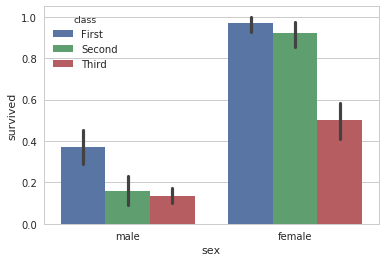

In [48]:
sns.barplot(x="sex", y="survived", hue="class", data=barco)

Here the graph counts the number of entries on each category rather than computing statistics.

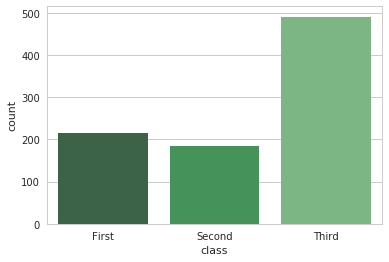

In [49]:
sns.countplot(x="class", data=barco, palette="Greens_d");

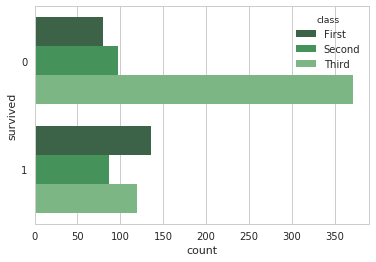

In [50]:
sns.countplot(y="survived", hue="class", data=barco, palette="Greens_d")

### Point plots

**pointplots** are an alternative to **barplots**. The seem cleaner and have the advantage that human eyes are  good comparing slopes.

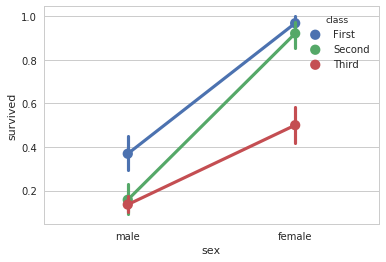

In [51]:
sns.pointplot(x="sex", y="survived", hue="class", data=barco)

### Plotting "wide-form" data

These are used when the data is in "wide-form" (multiple columns)

<class 'pandas.core.frame.DataFrame'>
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


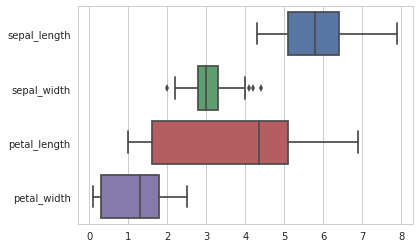

In [58]:
print type(eyes)
print eyes.head(5)
sns.boxplot(data=flower, orient="h")

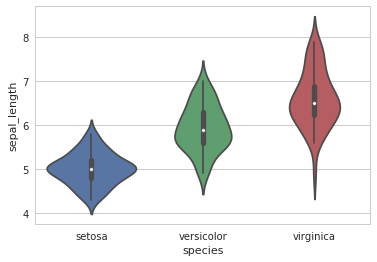

In [59]:
sns.violinplot(x=flower.species, y=flower.sepal_length)

## Drawing multi-panel categorical plots

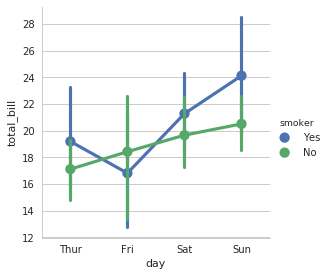

In [60]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=propina)

You can choose the kind of plot to use using the ***kind*** parameter:

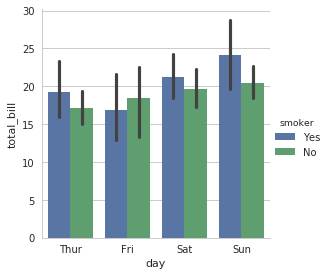

In [61]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=propina, kind="bar")

Same parameters except ***kind***

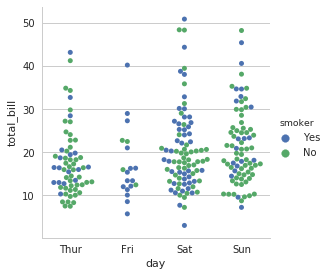

In [62]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=propina, kind="swarm")

This example uses a **PairGrid** object to show categorical relationships accross several variables:

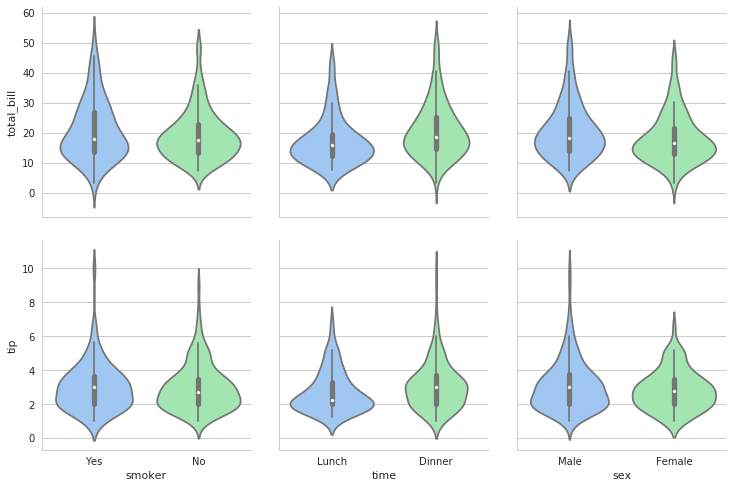

In [63]:
g = sns.PairGrid(propina,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=1, size=3.5)
g.map(sns.violinplot, palette="pastel")